In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
from statsmodels.graphics.api import qqplot
import os
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from pmdarima import model_selection

In [3]:
dir_path = "C:\\Users\\weber\\Documents\\Project-1018"
# dir_path =  "C:\\Users\\chen5\\ProbTimeSeries\\Project"

In [47]:
df = pd.read_csv(os.path.join(dir_path,'importdata','HOURLY_LOAD-202208.csv'))

In [48]:
df.columns = df.columns.str.replace(' ','')

In [49]:
data = df['CSWS'][:120]
# train, test = model_selection.train_test_split(csws, train_size=100)
train = csws[:100]
test1 = csws[100:110]
test2 = csws[110:120]

array([ 5921.979,  5676.878,  5487.689,  5388.093,  5378.077,  5476.137,
        5638.465,  5845.921,  6169.014,  6572.66 ,  7019.079,  7467.36 ,
        7889.068,  8273.507,  8631.198,  8835.834,  8827.705,  8823.46 ,
        8719.871,  8378.299,  7988.454,  7585.52 ,  7069.821,  6582.992,
        6150.056,  5833.165,  5621.557,  5463.06 ,  5402.003,  5493.913,
        5657.426,  5849.317,  6207.61 ,  6732.32 ,  7398.572,  8077.318,
        8701.634,  9208.744,  9512.939,  9700.616,  9696.731,  9584.601,
        9367.521,  8990.128,  8578.21 ,  8192.977,  7632.77 ,  7068.327,
        6622.783,  6245.65 ,  5982.352,  5804.848,  5697.635,  5749.785,
        5893.819,  6074.257,  6516.924,  7089.841,  7726.68 ,  8336.195,
        8855.916,  9372.733,  9708.795,  9937.029, 10009.531,  9928.682,
        9667.517,  9262.028,  8755.884,  8285.306,  7741.269,  7198.079,
        6739.196,  6382.216,  6090.499,  5894.368,  5775.502,  5833.983,
        5950.844,  6038.408,  6289.621,  6624.24 , 

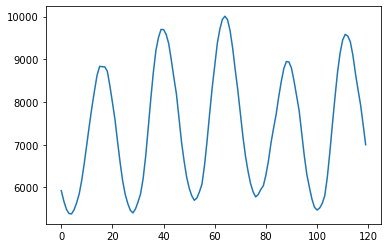

In [50]:
plt.plot(data)

In [73]:
arima = pm.auto_arima(train, stepwise=False,Seasonal = True)
arima

ARIMA(order=(2, 0, 3), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

[9384.47900042 9482.26563418 9436.64591264 9250.96687885 8939.29962092
 8524.06169085 8034.41253661 7504.21167248 6969.6821793  6466.94043982]
(10,)


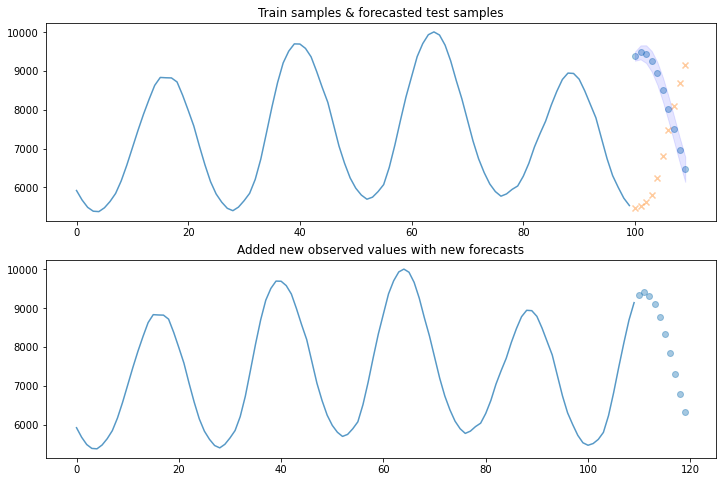

In [76]:
# Looks good
data = df['CSWS'][:120]
preds, conf_int = arima.predict(n_periods=test1.shape[0],
                                return_conf_int=True)

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
x_axis = np.arange(train.shape[0] + preds.shape[0])
axes[0].plot(x_axis[:train.shape[0]], train, alpha=0.75)
axes[0].scatter(x_axis[train.shape[0]:], preds, alpha=0.4, marker='o')
axes[0].scatter(x_axis[train.shape[0]:], test1, alpha=0.4, marker='x')
axes[0].fill_between(x_axis[-preds.shape[0]:], conf_int[:, 0], conf_int[:, 1],
                     alpha=0.1, color='b')

# fill the section where we "held out" samples in our model fit

axes[0].set_title("Train samples & forecasted test samples")

# Now add the actual samples to the model and create NEW forecasts
arima.update(test1)
new_preds, new_conf_int = arima.predict(n_periods=10, return_conf_int=True)
new_x_axis = np.arange(data.shape[0] + 10)

# new_x_axis2 = np.arange(data.shape[0] + 20)
data = np.append(train,test1)
print(new_x_axis[data.shape[0]:data.shape[0]+10].shape)
axes[1].plot(new_x_axis[:data.shape[0]], data, alpha=0.75)
axes[1].scatter(new_x_axis[data.shape[0]:data.shape[0]+10], new_preds, alpha=0.4, marker='o')
# axes[1].scatter(new_x_axis[data.shape[0]:], test2, alpha=0.4, marker='x')
# axes[1].fill_between(new_x_axis[-new_preds.shape[0]:],
#                      new_conf_int[:, 0],
#                      new_conf_int[:, 1],
#                      alpha=0.1, color='g')
axes[1].set_title("Added new observed values with new forecasts")
plt.show()

In [84]:
# Training on the entire dataset with update
data = df["CSWS"]
train = data[:100]
step_size = 12
arima = pm.auto_arima(train, stepwise=False)

    


In [89]:
data.shape

(744,)

In [107]:
all_preds = np.array([])
for idx in range(100,data.shape[0],step_size):
    preds, conf_int = arima.predict(n_periods=step_size,
                                    return_conf_int=True)
    test = data[idx:idx+step_size]
    
    all_preds = np.append(all_preds,preds)
    arima.update(test)


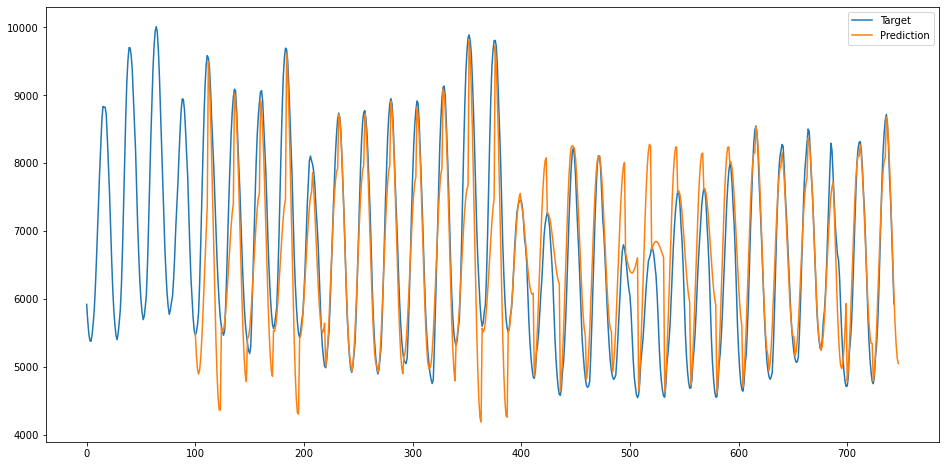

In [106]:
fig,ax = plt.subplots(1,1,figsize = (16,8))
temp = pd.Series(data = all_preds,index = np.arange(100,748))
plt.plot(data,label = "Target")
plt.plot(temp,label = "Prediction")
plt.legend()

### GP

In [109]:
# from sklearn import gaussian_process
# from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel,ExpSineSquared

In [ ]:
# kernel = ConstantKernel(constant_value=1, constant_value_bounds=(1e-5, 1e5)) + RBF(length_scale=2) 

In [ ]:
# gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
# gp.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))